## Implementation of Monte Carlo Simulation in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# set variables for the Percent to target based on historical results
avg = 1
std_dev = .05
num_reps = 1000
num_simulations = 10000

In [3]:
# calculating the percent to target
pct_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [4]:
pct_target[0:10]

array([0.91, 1.05, 0.96, 0.94, 0.88, 1.05, 1.01, 0.98, 0.88, 0.98])

In [5]:
# Another example -- using 'sales target' distribution

sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [6]:
sales_target[0:10]

array([ 75000, 200000, 100000,  75000, 100000,  75000,  75000, 100000,
        75000, 200000])

In [7]:
# creating the dataframe
df = pd.DataFrame(index=range(num_reps), data={'Pct_Target': pct_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_Target,Sales_Target
0,0.91,75000
1,1.05,200000
2,0.96,100000
3,0.94,75000
4,0.88,100000


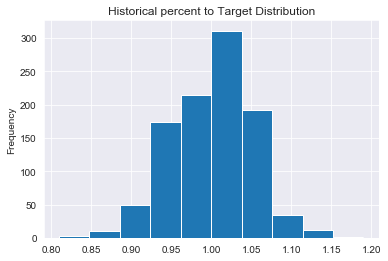

In [8]:
# visualizing the distribution using a histogram 
df['Pct_Target'].plot(kind='hist', title='Historical percent to Target Distribution')
plt.show()

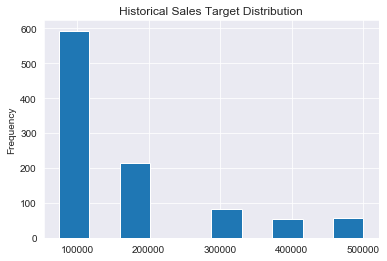

In [9]:
# Visualizing the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')
plt.show()

In [10]:

# sales amount
df['Sales'] = df['Pct_Target'] * df['Sales_Target']

In [11]:
def get_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 5%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .05

In [12]:
df['Commission_Rate'] = df['Pct_Target'].apply(get_commission_rate)
df.head()

,Pct_Target,Sales_Target,Sales,Commission_Rate
0,0.91,75000,68250.0,0.03
1,1.05,200000,210000.0,0.05
2,0.96,100000,96000.0,0.03
3,0.94,75000,70500.0,0.03
4,0.88,100000,88000.0,0.02


In [13]:
#get actual commission amount

df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.91,75000,68250.0,0.03,2047.5
1,1.05,200000,210000.0,0.05,10500.0
2,0.96,100000,96000.0,0.03,2880.0
3,0.94,75000,70500.0,0.03,2115.0
4,0.88,100000,88000.0,0.02,1760.0


In [14]:
#get sum of each of sales, sales_target and commission amount
df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum()

(169289500.0, 7005895.0, 169225000)

In [15]:
#key summary statistics
df.describe()

,Pct_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.000080,169225.000000,169289.500000,0.04078,7005.895000
std,0.048709,122002.700929,122416.744357,0.01030,5682.462452
min,0.810000,75000.000000,64500.000000,0.02000,1290.000000
25%,0.970000,75000.000000,78000.000000,0.03000,2970.000000
50%,1.000000,100000.000000,102000.000000,0.05000,5100.000000
75%,1.030000,200000.000000,208000.000000,0.05000,10100.000000
max,1.190000,500000.000000,560000.000000,0.05000,28000.000000


### Full Simulation - Combining the results of each round of simulation

In [16]:
# Initializing a list to keep the results from each round of simulation 
all_stats = []

# Loop through the simulations
for i in range(num_simulations):
    
    # Choosing random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Dataframe for the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_Target': pct_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_Target'] * df['Sales_Target']
    
    # Determining the commission rate and commision amount
    df['Commission_Rate'] = df['Pct_Target'].apply(get_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    #tracking sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [17]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [18]:
results_df.describe().round().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"10,000.0","10,000.0","10,000.0"
mean,"167,492,125.0","6,857,150.0","167,492,992.0"
std,"3,763,351.0","170,634.0","3,753,256.0"
min,"153,737,500.0","6,211,128.0","153,675,000.0"
25%,"164,890,062.0","6,740,431.0","164,925,000.0"
50%,"167,465,250.0","6,853,900.0","167,450,000.0"
75%,"170,052,312.0","6,971,926.0","170,075,000.0"
max,"182,642,000.0","7,520,312.0","182,350,000.0"


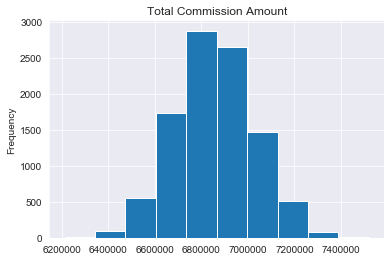

In [19]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")
plt.show()

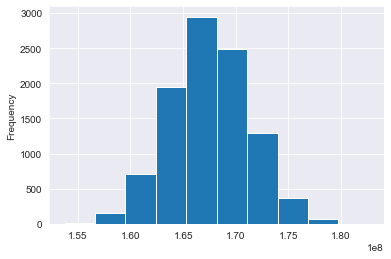

In [20]:
results_df['Sales'].plot(kind='hist')
plt.show()